In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('Boliga - Final for training.csv')

In [3]:
df

,basementSize,buildYear,Ejerudgift,isForeclosure,lotSize,price,rooms,size,squaremeterPrice,Kommune,Type,Relativ Ledighed,Grundskole,Gymnasiale uddannelser,Erhvervsfaglige uddannelser,KVU,MVU,Bacheloruddannelser,LVU,Kommunal_gennemsnitsinkomst_2017,Total_reported,Population_in_urban_development,Socioeconomic_index,expenses_per_school_student,average_class_size,expenses_sport_and_other_cultural_activities,lake_distance,forest_distance,doctor_distance,supermarket_distance,school_distance,daycare_distance,hospital_distance,train_distance,pharmacy_distance,library_distance,coast_distance,junction_distance
0,0,1767,16872,False,0,18750000,6.0,280,66964.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.13204,7.22733,0.11111,0.24096,0.35005,0.39428,2.67332,1.05650,0.38665,0.92771,0.41379,4.65646
1,88,1880,5702,False,0,10500000,4.0,83,126506.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.20441,7.30106,0.29860,0.59852,0.42607,0.43139,2.95715,1.41122,0.70159,1.23705,0.03508,4.94359
2,0,1755,9486,False,0,15000000,7.0,274,54744.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.18899,7.36108,0.26852,0.71105,0.48610,0.40131,2.92707,1.38115,0.67141,1.29708,0.07032,4.91351
3,0,1880,17609,False,0,19995000,7.0,296,67550.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.20441,7.30106,0.29860,0.59852,0.42607,0.43139,2.95715,1.41122,0.70159,1.23705,0.03508,4.94359
4,0,1873,5590,False,0,8750000,7.0,163,53680.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.25292,7.23167,0.39571,0.64693,0.36048,0.52840,3.05426,1.50833,0.79860,1.16766,0.12353,5.04060
5,0,1873,5739,False,0,11500000,4.0,164,70121.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.29041,7.15658,0.40142,0.73205,0.36620,0.53411,3.05997,1.51405,0.80431,1.09268,0.14719,5.04631
6,0,1870,4461,False,0,4495000,3.0,76,59144.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.09059,6.95677,0.62901,0.81589,0.40758,0.76180,3.11336,1.56743,0.82495,0.89286,0.19007,5.09980
7,0,1872,9790,False,0,4494000,6.0,132,0.0,København,Andelsbolig,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.07550,6.94177,0.59185,0.68329,0.27518,0.70480,3.03906,1.44973,0.73779,0.87776,0.22029,5.02540
8,0,1900,5606,False,0,9500000,4.0,122,77868.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.09335,6.95952,0.59336,0.77569,0.45853,0.72605,3.16441,1.61848,0.82770,0.89561,0.14033,5.15075
9,0,1796,2771,False,0,5995000,3.0,125,47960.0,København,Ejerlejlighed,7.926682,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,0.188050,100.0,1.08,69710,22.8,1062,1.21384,6.74242,0.40809,0.26543,0.57113,0.53086,2.80540,1.00050,0.26553,0.80509,0.09079,4.85385


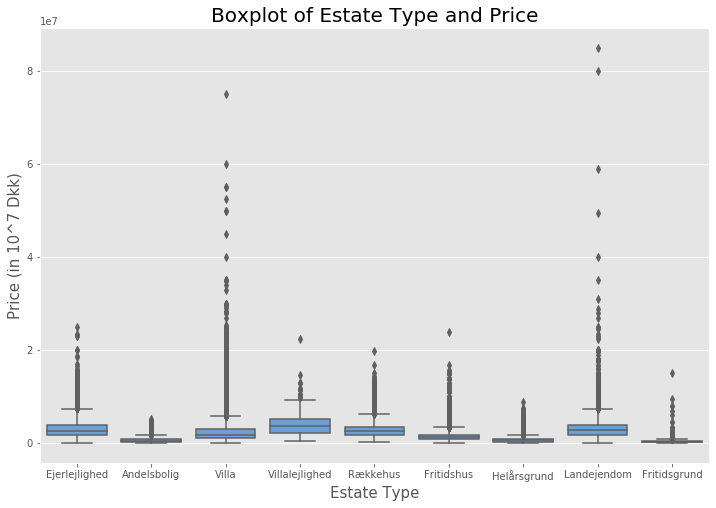

In [4]:
from numpy import median
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x="Type", y="price", data=df, color = '#5AA0E7')
plt.title('Boxplot of Estate Type and Price', size = 20)
plt.xlabel('Estate Type', size = 15)
plt.ylabel('Price (in 10^7 Dkk)', size = 15)
#ax.set(ylim=(0, df.price.max()))
fig.savefig('Boxplot_Estate.png')

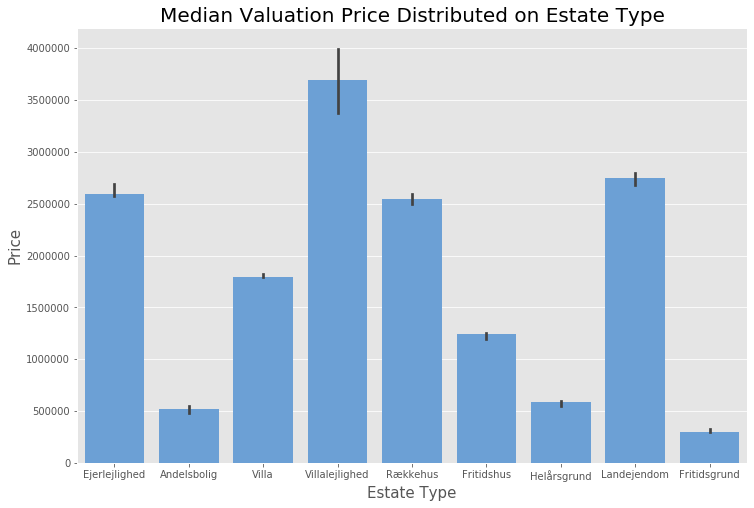

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x="Type", y="price", data=df, estimator=median, color = '#5AA0E7')
plt.title('Median Valuation Price Distributed on Estate Type', size = 20)
plt.xlabel('Estate Type', size = 15)
plt.ylabel('Price', size = 15)
fig.savefig('Barplot_Estate.png')

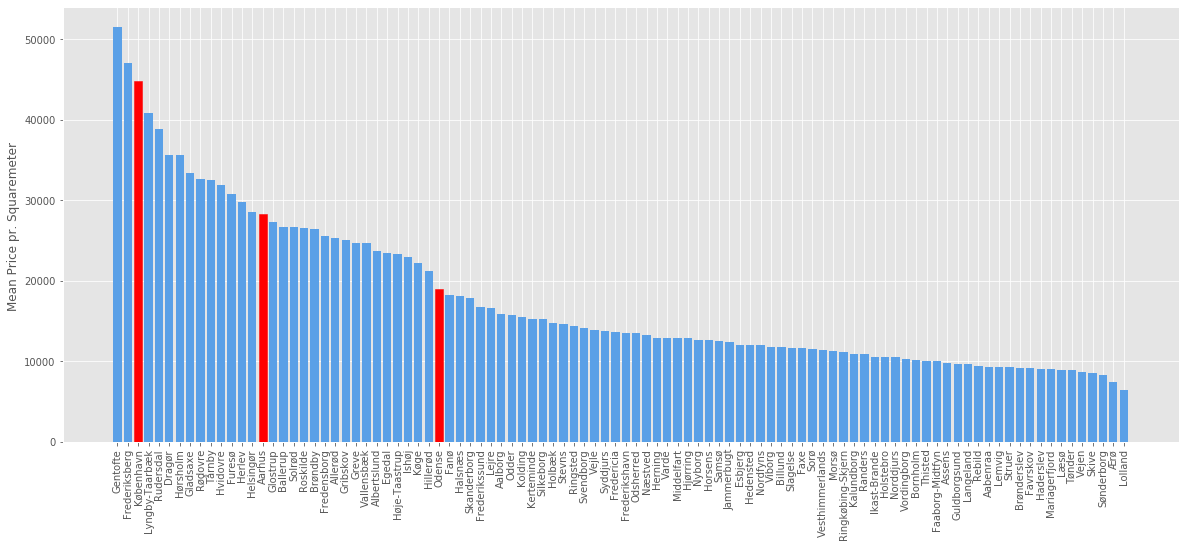

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
df1 = df.groupby('Kommune').mean().reset_index()
df1 = df1.sort_values('squaremeterPrice', ascending = False)
ax = plt.bar(range(len(df1)), df1['squaremeterPrice'], color=["#5AA0E7"])
ax[2].set_color('r') # København
ax[14].set_color('r') # Århus
ax[31].set_color('r') # Odense
plt.xticks(range(len(df1)), df1['Kommune'], rotation = 'vertical')
plt.ylabel('Mean Price pr. Squaremeter ')
fig.savefig('Barplot_Municipality.png')

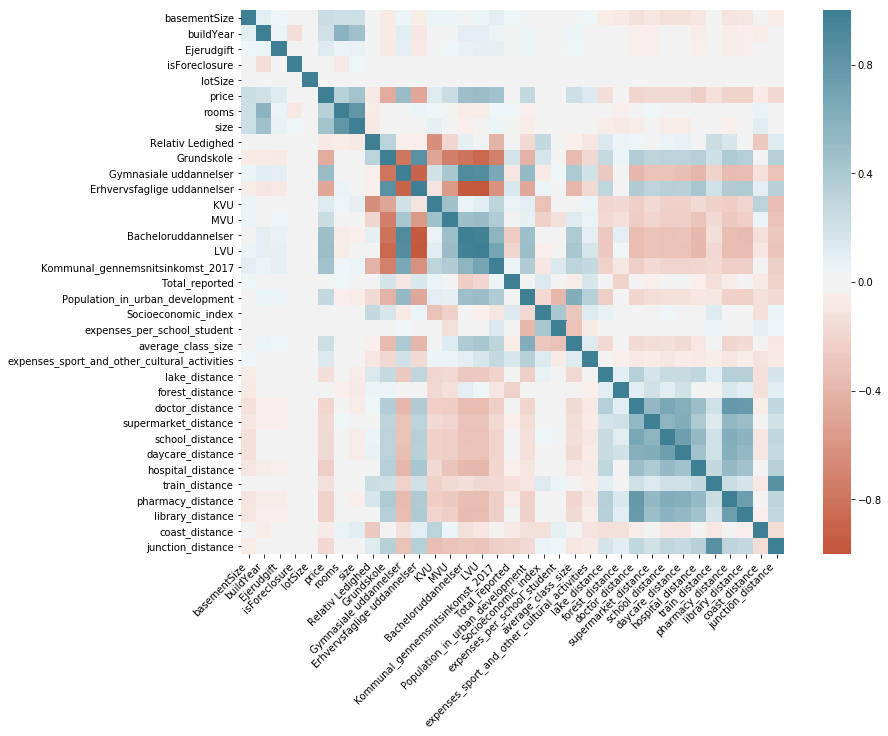

In [9]:
corr = df.corr()
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df = df.drop(columns = ['Kommune', 'lotSize', 'Relativ Ledighed', 'Total_reported',
                        'Socioeconomic_index', 'expenses_per_school_student',
                       'expenses_sport_and_other_cultural_activities', 'forest_distance',
                       'coast_distance', 'isForeclosure', 'Ejerudgift'])
